# importing

In [48]:
# importing necessary libraries -  
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
import statsmodels.api as sm
import scipy.stats as stats
import os
#import ax
from scipy.stats import linregress

warnings.filterwarnings("ignore")

save_dir = os.path.abspath('figures')

# funtions: Q-Q plot, save fig

In [74]:
def qq_plot_4_by_3(df, key_metrics, titles):

    # Create QQ plot using statsmodels
    fig, axes = plt.subplots(4, 3, figsize=(18, 30))
    
    for ax, metric, title in zip(axes.flatten(), key_metrics, titles):
        # Plot a histogram with KDE (Kernel Density Estimation) to visualize distribution
        sm.qqplot(df[metric], line='s', ax=ax)
        #sns.histplot(df[metric], kde=True, ax=ax)
    
        # Set the title and axis labels
        ax.set_title(title, fontsize=14)
        ax.set_xlabel('Theoretical Quantiles', fontsize=12)
        ax.set_ylabel('Sample Quantiles', fontsize=12)

    axes[3,1].set_visible(False)
    axes[3,2].set_visible(False)


    return fig

def qq_plot_1_by_2(df, key_metrics, titles):

    # Create QQ plot using statsmodels
    fig, axes = plt.subplots(1, 2, figsize=(18, 10))
    
    for ax, metric, title in zip(axes.flatten(), key_metrics, titles):
        # Plot a histogram with KDE (Kernel Density Estimation) to visualize distribution
        sm.qqplot(df[metric], line='s', ax=ax)
        #sns.histplot(df[metric], kde=True, ax=ax)
    
        # Set the title and axis labels
        ax.set_title(title, fontsize=14)
        ax.set_xlabel('Theoretical Quantiles', fontsize=12)
        ax.set_ylabel('Sample Quantiles', fontsize=12)

        ks_stat, ks_p_value = KS_norm_test(df[metric])

        ax.text(0.02, 0.93, f"KS Statistic: {ks_stat}\np-value: {ks_p_value}",
            transform=ax.transAxes,
            fontsize=12)
    return fig

def save_plot(fig, name, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    try:
        plt.savefig(os.path.join(save_dir, name+'.png'))
    except Exception as e:
        print(f"Error saving figure: {e}")

def KS_norm_test(data):
    
    ks_stat, ks_p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))

    print(f"KS Statistic: {ks_stat}\np-value: {ks_p_value}")

    return ks_stat, ks_p_value

def MWU_test(data1, data2):
    statistic, p_value = stats.mannwhitneyu(data1, data2, alternative='greater')

    data1 = data1.dropna()
    data2 = data2.dropna()
    print(f"Mann-Whitney U statistic: {statistic}")
    print(f"P-value: {p_value}")

    return statistic, p_value

def distributions_plot_4_on_3(df, key_metrics, titles):

    # Create QQ plot using statsmodels
    fig, axes = plt.subplots(4, 3, figsize=(18, 30))
    
    for ax, metric, title in zip(axes.flatten(), key_metrics, titles):
        # Plot a histogram with KDE (Kernel Density Estimation) to visualize distribution
        sns.histplot(df[metric], kde=True, ax=ax)
        
        # Set the title and axis labels
        ax.set_title(title, fontsize=14)
        ax.set_xlabel(metric.capitalize(), fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)
        axes[3,1].set_visible(False)
        axes[3,2].set_visible(False)
    return fig

def distributions_plot_1_on_2(df, key_metrics, titles):

    # Create QQ plot using statsmodels
    fig, axes = plt.subplots(1, 2, figsize=(18, 10))
    
    for ax, metric, title in zip(axes.flatten(), key_metrics, titles):
        # Plot a histogram with KDE (Kernel Density Estimation) to visualize distribution
        sns.histplot(df[metric], kde=True, ax=ax)
        
        # Set the title and axis labels
        ax.set_title(title, fontsize=14)
        ax.set_xlabel(metric.capitalize(), fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)
    return fig

def save_plot2(fig, name, save_dir):
    import os
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    try:
        fig.savefig(os.path.join(save_dir, name + '.png'))
    except Exception as e:
        print(f"Error saving figure: {e}")

# getting data

In [50]:
df = pd.DataFrame(pd.read_csv('all_seasons.csv'))

# Displaying the shape of the data - 
df.shape

# Displaying the basic info of the data - 
df.info()

# Checking the data type of column - 
df.dtypes

# Convert to numeric types ( If conversion isn't possible for some values, they'll become NaN)
df['draft_year'] = pd.to_numeric(df['draft_year'], errors='coerce')
df['draft_round'] = pd.to_numeric(df['draft_round'], errors='coerce')
df['draft_number'] = pd.to_numeric(df['draft_number'], errors='coerce')

# First convert to float (above), then to integer and filling the errors with '0' (Undrafted = 0)
df['draft_year'] = df['draft_year'].fillna(0).astype(int)
df['draft_round'] = df['draft_round'].fillna(0).astype(int)
df['draft_number'] = df['draft_number'].fillna(0).astype(int)

# Verify the new data types
print(df[['draft_year', 'draft_round', 'draft_number']].dtypes)

# Displaying top 5 rows of  the dataset - 
df.head()

# Dropping the column 'Unnamed: 0'
df.drop('Unnamed: 0' , axis=1 , inplace=True)

# Dispalying the null values present in each column - 
df.isnull().sum()

# Filling the null values for the 'college' column - 
df['college'].fillna('Others', inplace=True)

# Displaying the duplicate values - 
df.duplicated().sum()

# Displaying Column names - 
df.columns

# Stats of the data - 
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

,count,mean,std,min,25%,50%,75%,max
age,12844.0,27.045313,4.339211,18.000000,24.0000,26.00000,30.00000,44.00000
player_height,12844.0,200.555097,9.111090,160.020000,193.0400,200.66000,208.28000,231.14000
player_weight,12844.0,100.263279,12.426628,60.327736,90.7184,99.79024,108.86208,163.29312
draft_year,12844.0,1636.115151,775.928390,0.000000,1991.0000,2001.00000,2009.00000,2022.00000
draft_round,12844.0,1.059172,0.683223,0.000000,1.0000,1.00000,1.00000,8.00000
draft_number,12844.0,17.774914,16.803276,0.000000,3.0000,14.00000,29.00000,165.00000
gp,12844.0,51.154158,25.084904,1.000000,31.0000,57.00000,73.00000,85.00000
pts,12844.0,8.212582,6.016573,0.000000,3.6000,6.70000,11.50000,36.10000
reb,12844.0,3.558486,2.477885,0.000000,1.8000,3.00000,4.70000,16.30000
ast,12844.0,1.824681,1.800840,0.000000,0.6000,1.20000,2.40000,11.70000


# Height and Weight classification

In [60]:
def height_classification(x):
    if x < df['player_height'].mean():
        return 'low'
    else:
        return 'high'
    
def weight_classification(x):
    if x < df['player_weight'].mean():
        return 'low'
    else:
        return 'high'

# heatmap

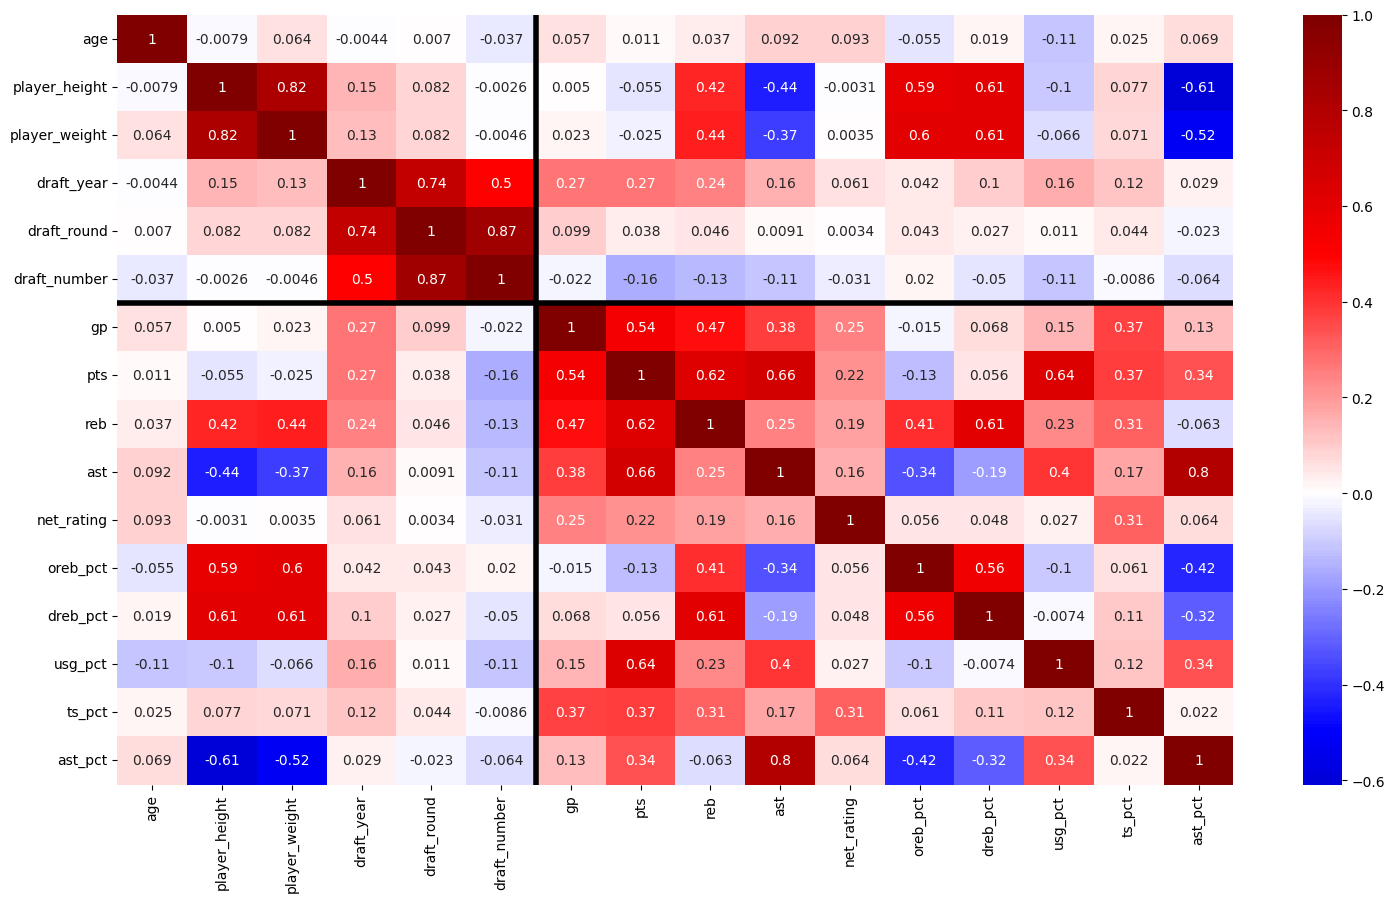

In [101]:
# Plotting a correlation matrix to check the correlation -
numerical = df.select_dtypes(['int','float'])
numerical.head()
corr_matrix = numerical.corr()

fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap='seismic', center=0)
ax.hlines(6, *ax.get_xlim(), colors='k', lw=4)
ax.vlines(6, *ax.get_xlim(), colors='k', lw=4)
#ax.hlines(*ax.get_ylim(), [3, 6, 9])
save_plot(fig, 'corr_matrix', save_dir)


# Small heatmap

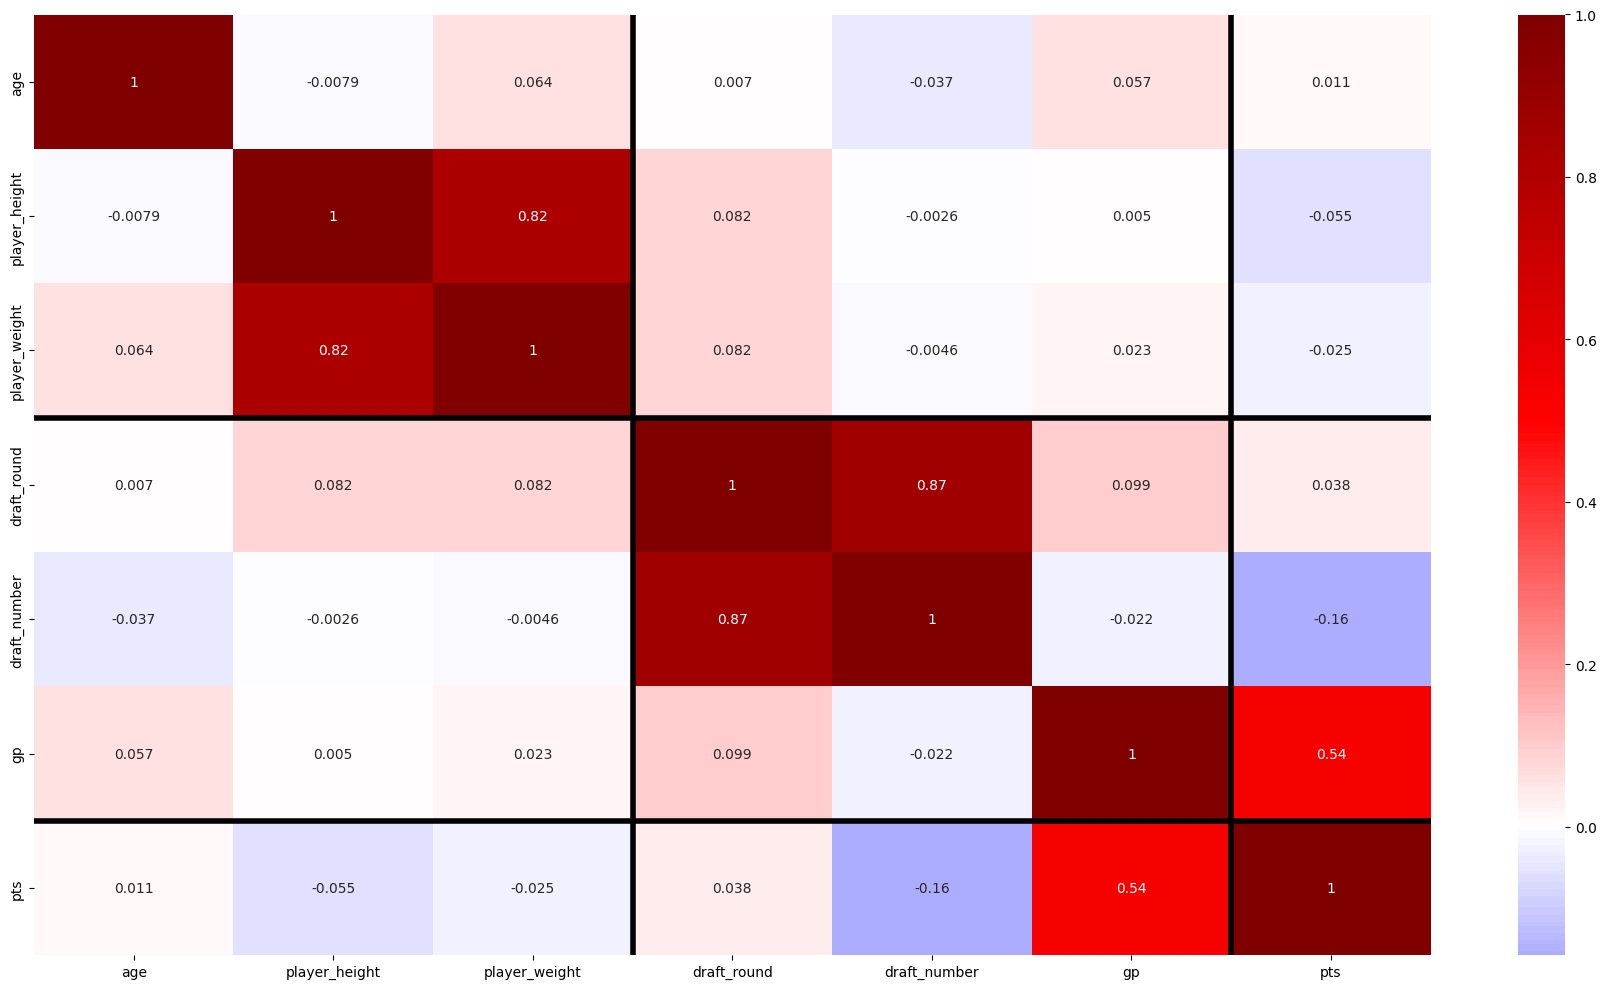

In [110]:
# Plotting a correlation matrix to check the correlation -
selected_columns = ['age', 'player_height', 'player_weight', 'draft_round', 'draft_number', 'gp', 'pts']
small_df = df[selected_columns]

small_df.head()
corr_matrix = small_df.corr()

fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap='seismic', center=0)
ax.hlines([3,6], *ax.get_xlim(), colors='k', lw=4)
ax.vlines([3,6], *ax.get_xlim(), colors='k', lw=4)
#ax.hlines(*ax.get_ylim(), [3, 6, 9])
plt.tight_layout()

save_plot(fig, 'small_corr_matrix', save_dir)

# key_metrics and Tatiles


In [52]:
key_metrics = ['gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct','usg_pct', 'ts_pct', 'ast_pct']
titles = ['Games Played', 'Points Per Game', 'Rebounds Per Game', 'Assists Per Game', 'Net Rating', 'Offensive Rebound Percentage', 'Defensive Rebound Percentage', 'Usage Percentage', ' True Shooting Percentage', 'Assist Percentage']

# Q-Q plots - Pleyers Resolts

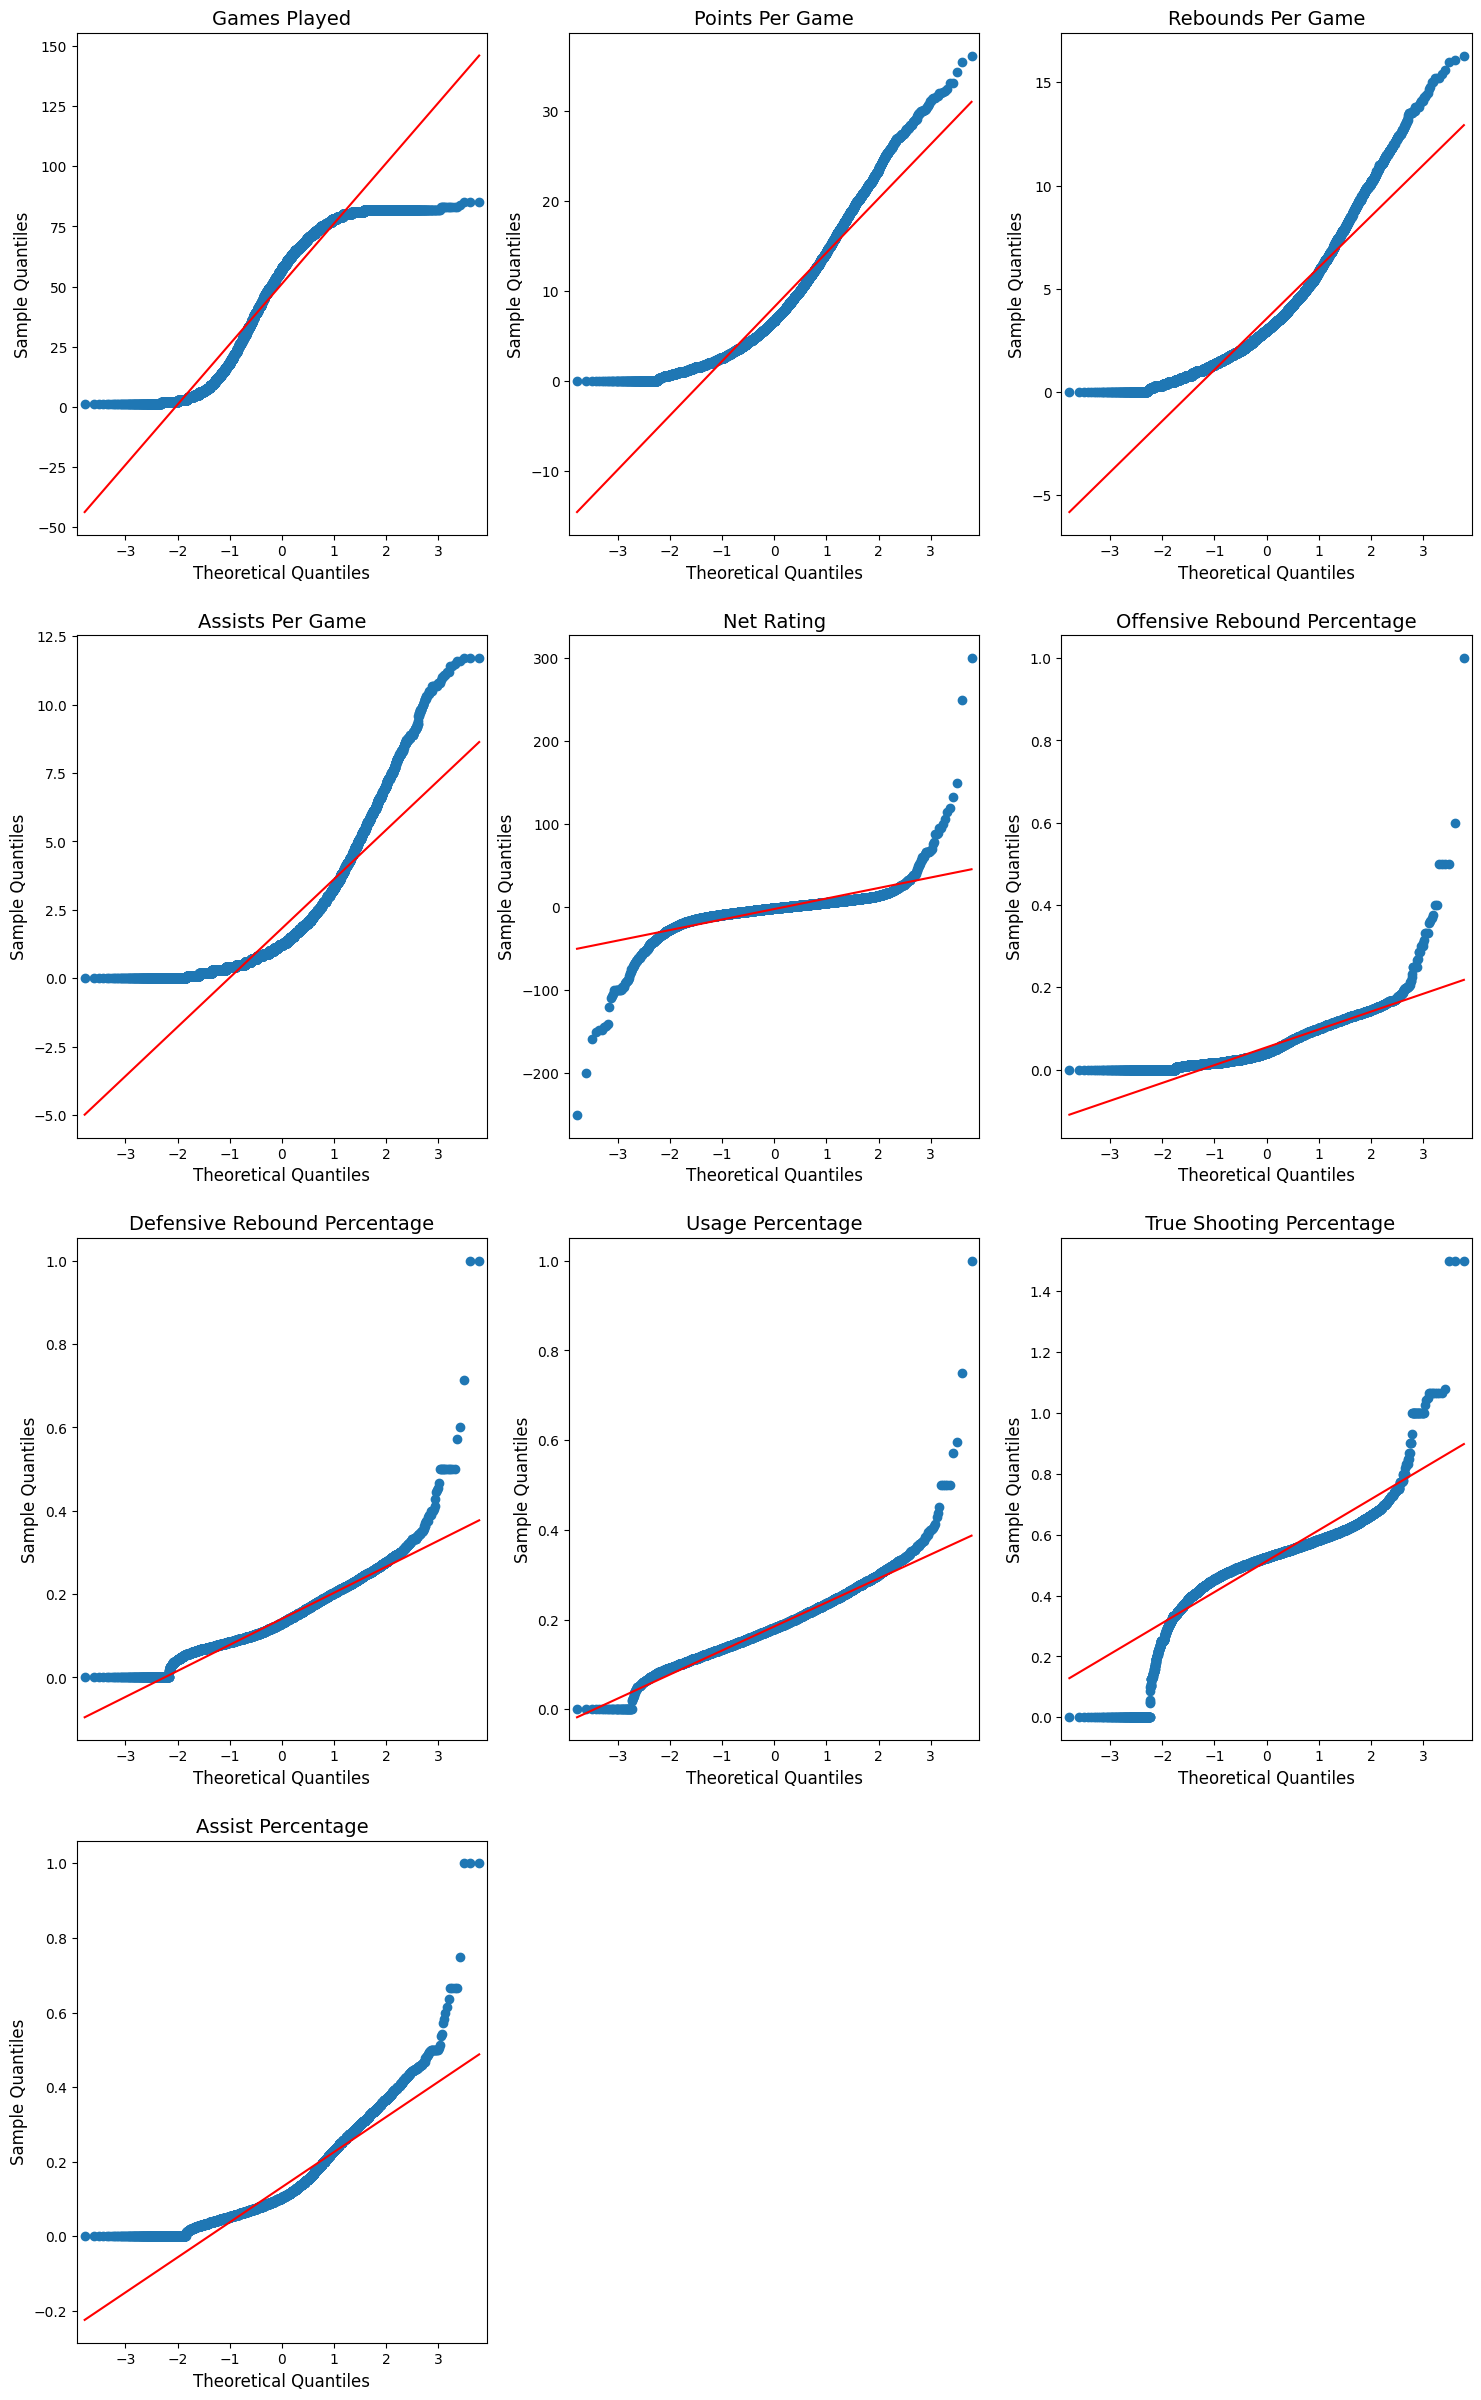

In [53]:
fig = qq_plot_4_by_3(df, key_metrics, titles)

save_plot(fig, 'q-q plots', save_dir)

# KS Tests - Pleyers Resolts

In [54]:
for metric, title in zip(key_metrics, titles):
    print(f"{title} KS test:")
    KS_norm_test(df[metric])

Games Played KS test:
KS Statistic: 0.11178637995292318
p-value: 2.96296000855528e-140
Points Per Game KS test:
KS Statistic: 0.103648420933098
p-value: 1.3636186318951877e-120
Rebounds Per Game KS test:
KS Statistic: 0.10821687555529436
p-value: 1.9105839919161718e-131
Assists Per Game KS test:
KS Statistic: 0.16061073667876197
p-value: 6.372682287666695e-290
Net Rating KS test:
KS Statistic: 0.13832736758982075
p-value: 7.592044684665039e-215
Offensive Rebound Percentage KS test:
KS Statistic: 0.12739880656672886
p-value: 3.457912245375297e-182
Defensive Rebound Percentage KS test:
KS Statistic: 0.0709463104536246
p-value: 1.162219038314749e-56
Usage Percentage KS test:
KS Statistic: 0.04280424760094248
p-value: 6.923132470707757e-21
 True Shooting Percentage KS test:
KS Statistic: 0.13176455895227687
p-value: 6.602105209153181e-195
Assist Percentage KS test:
KS Statistic: 0.13386381542159886
p-value: 3.538189703736382e-201


# Distributions plots - Pleyers Resolts

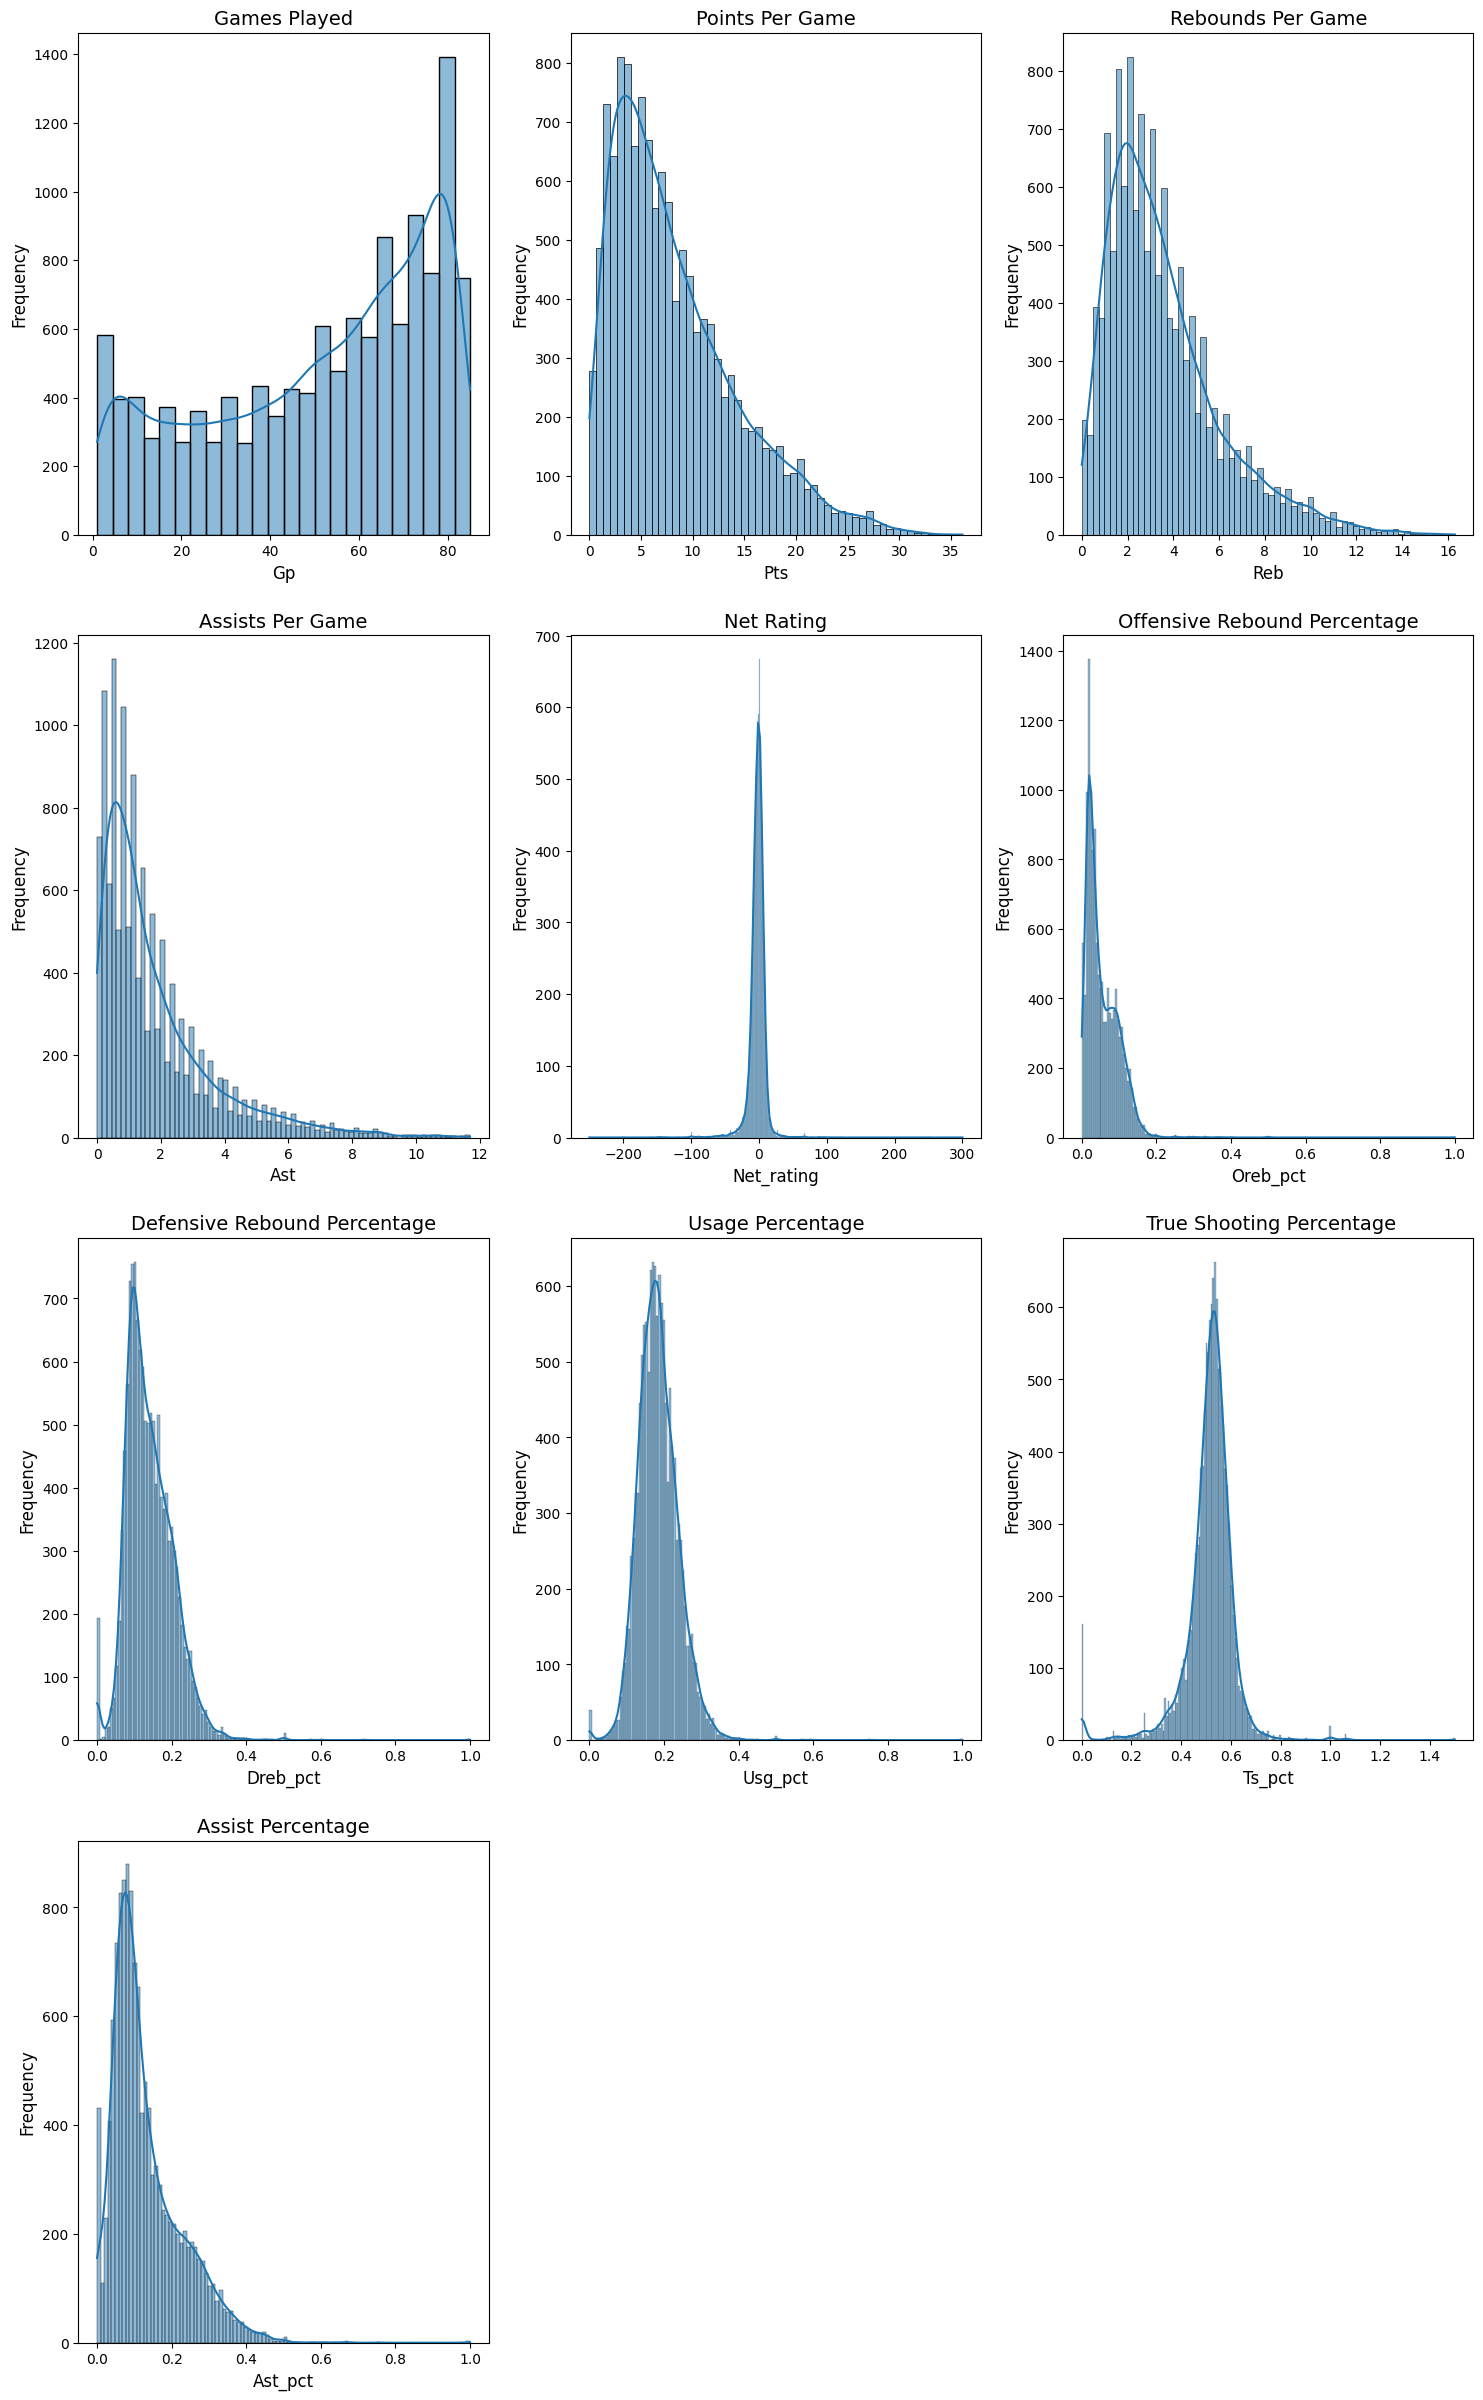

In [55]:
fig = distributions_plot_4_on_3(df, key_metrics, titles)

save_plot(fig, 'distributions plots', save_dir)

# PGS - Distrbtion and Q-Q plot

KS Statistic: 0.0418105664728301
p-value: 6.016351599863499e-20


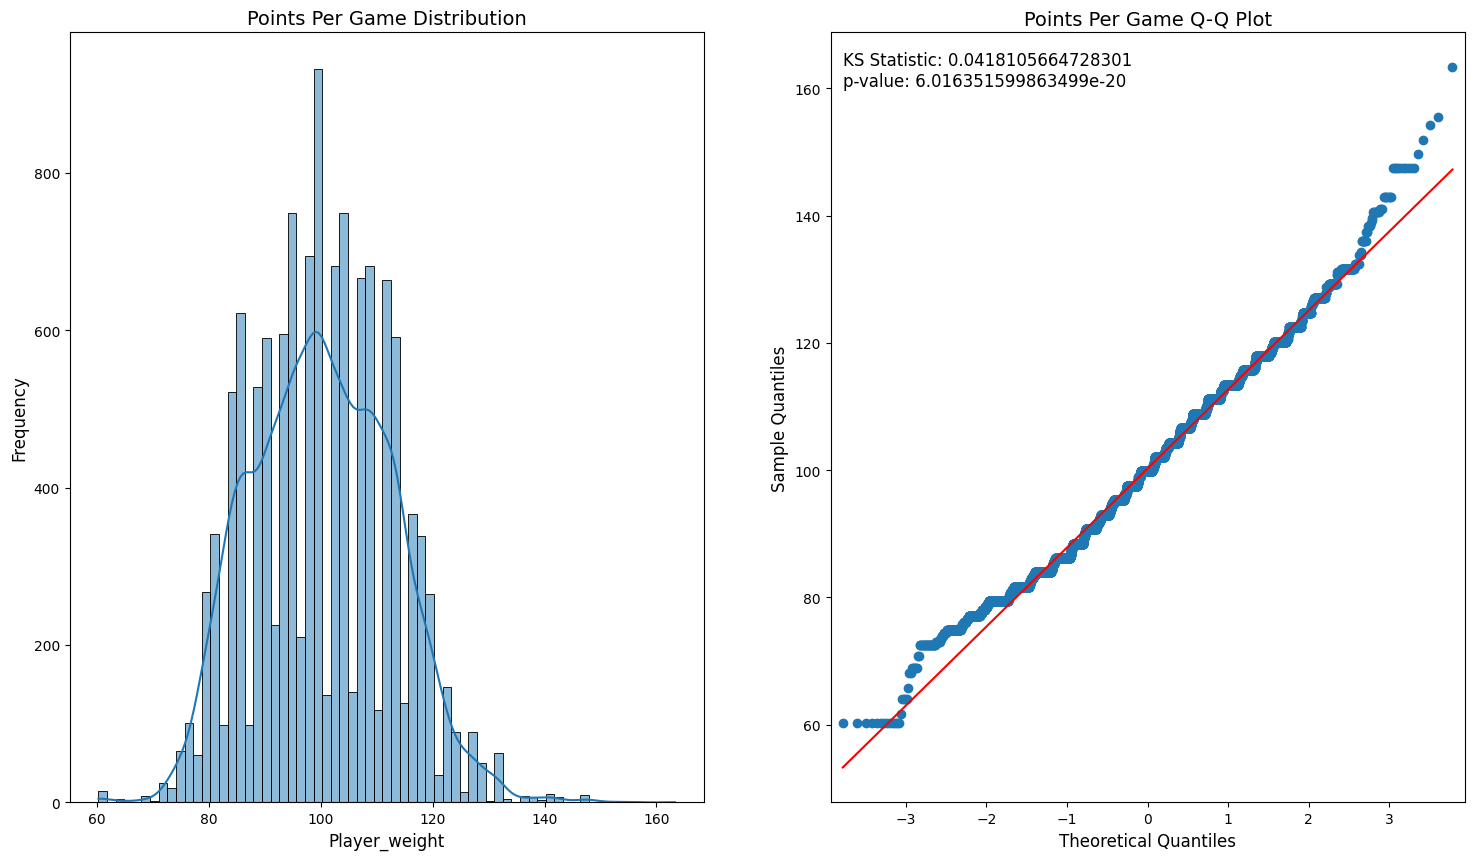

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

ax = axes[0]

sns.histplot(df[metric], kde=True, ax=ax)
        
# Set the title and axis labels
ax.set_title('Points Per Game Distribution', fontsize=14)
ax.set_xlabel(metric.capitalize(), fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)

ax = axes[1]

sm.qqplot(df[metric], line='s', ax=ax)
#sns.histplot(df[metric], kde=True, ax=ax)

# Set the title and axis labels
ax.set_title('Points Per Game Q-Q Plot', fontsize=14)
ax.set_xlabel('Theoretical Quantiles', fontsize=12)
ax.set_ylabel('Sample Quantiles', fontsize=12)

ks_stat, ks_p_value = KS_norm_test(df[metric])

ax.text(0.02, 0.93, f"KS Statistic: {ks_stat}\np-value: {ks_p_value}",
    transform=ax.transAxes,
    fontsize=12)

save_plot(fig, 'Points Per Game Distribution and Q-Q plot', save_dir)

# Player Height and Weight plots

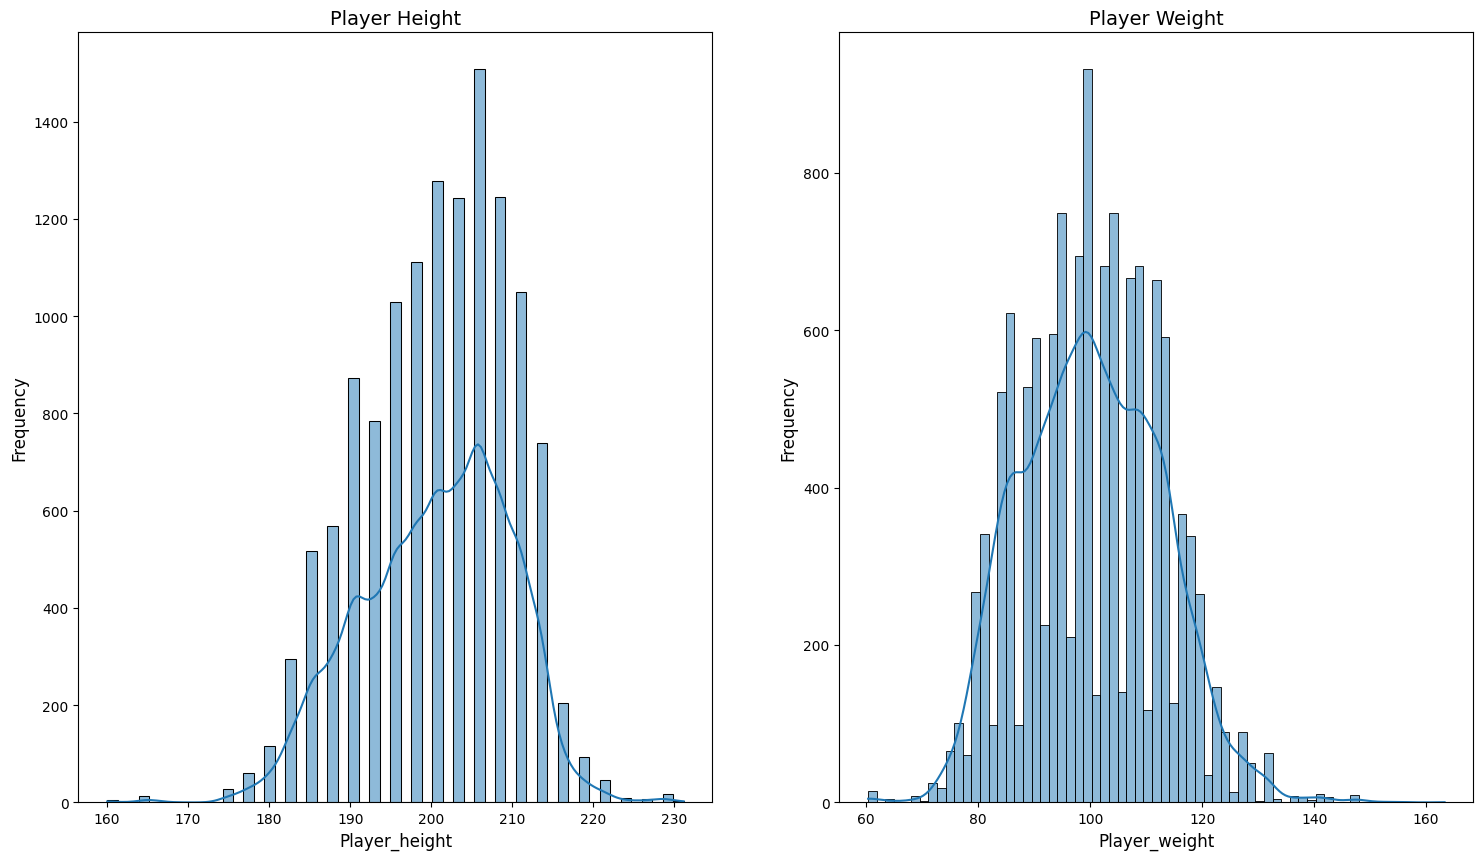

In [56]:
key_metrics = ['player_height', 'player_weight']
titles = ['Player Height', 'Player Weight']

fig = distributions_plot_1_on_2(df, key_metrics, titles)

save_plot(fig, 'distributions plots', save_dir)

# Q-Q - Player Height and Weight plots

KS Statistic: 0.09864706949768487
p-value: 2.9853029434848384e-109
KS Statistic: 0.0418105664728301
p-value: 6.016351599863499e-20


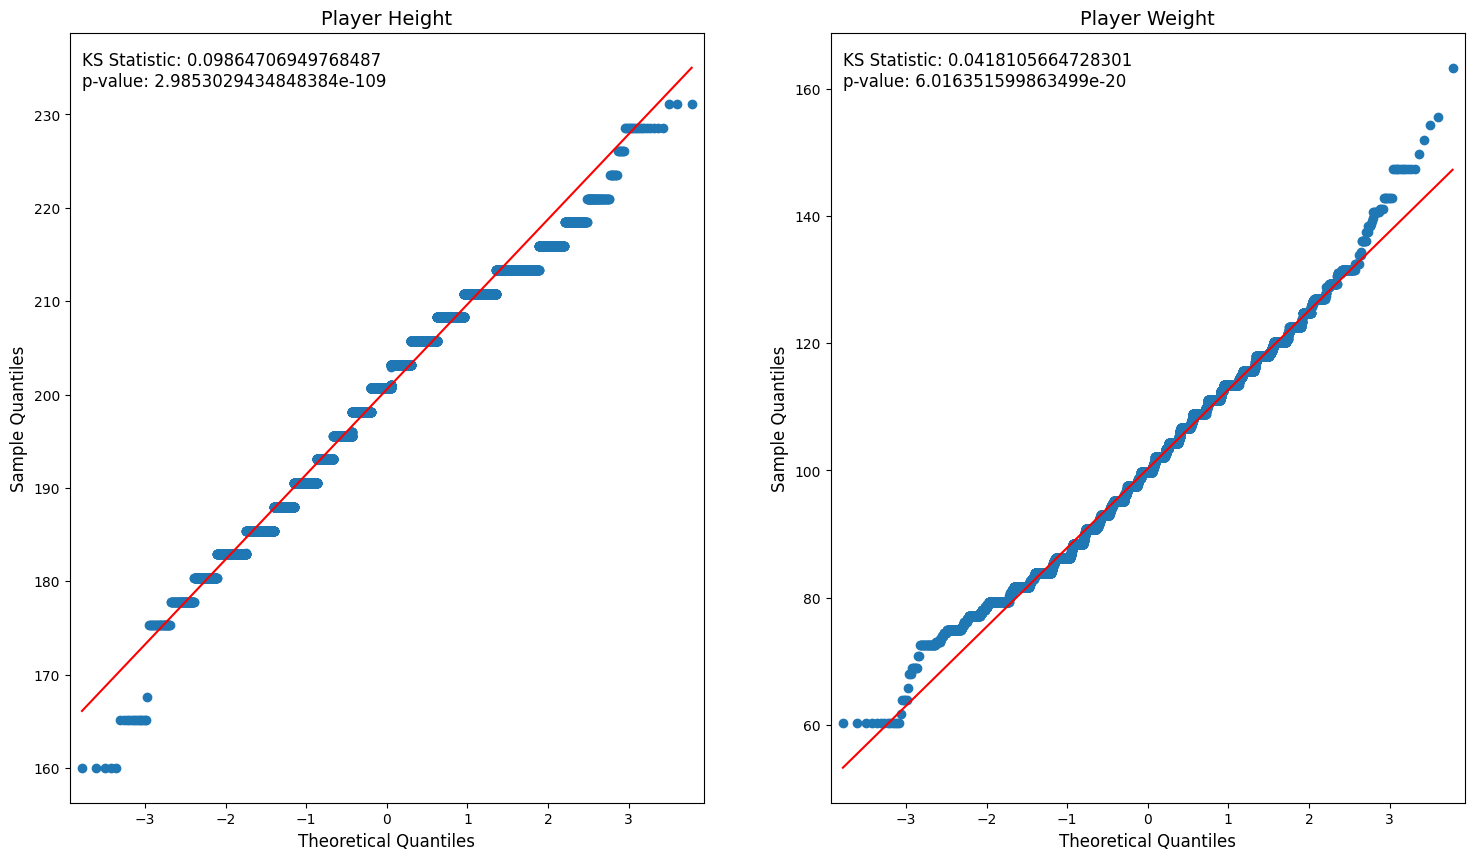

In [57]:
fig = qq_plot_1_by_2(df, key_metrics, titles)

save_plot(fig, 'q-q plots - Player Height and Weight', save_dir)

# KS - Player Height and Weight

In [58]:
for metric, title in zip(key_metrics, titles):
    print(f"{title} KS test:")
    KS_norm_test(df[metric])

Player Height KS test:
KS Statistic: 0.09864706949768487
p-value: 2.9853029434848384e-109
Player Weight KS test:
KS Statistic: 0.0418105664728301
p-value: 6.016351599863499e-20


# Player Height Vs Weight

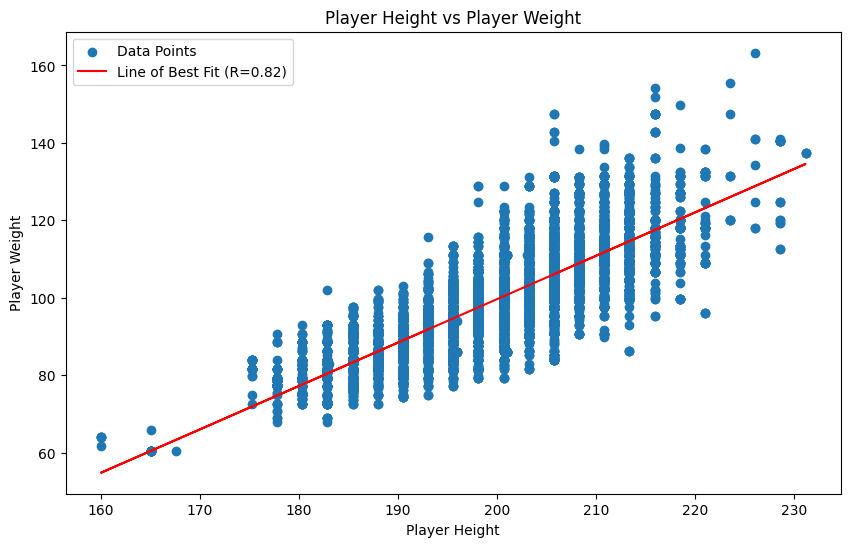

In [59]:
# Create a larger figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
ax.scatter(x=df['player_height'], y=df['player_weight'], label='Data Points')

# Perform linear regression
slope, intercept, r_value, _, _ = linregress(df['player_height'], df['player_weight'])
x_values = df['player_height']
ax.plot(x_values, intercept + slope * x_values, color='red', label=f'Line of Best Fit (R={r_value:.2f})')

# Add labels and title
ax.set_xlabel('Player Height')
ax.set_ylabel('Player Weight')
ax.set_title('Player Height vs Player Weight')

# Add legend
ax.legend()

# Show plot
plt.show()

# Save function (make sure you define save_plot)
save_plot2(fig, 'Height Vs Weight', save_dir)

# devied to clases

In [64]:
df['Height_katagory'] = df['player_height'].apply(height_classification)
df['Weight_katagory'] = df['player_weight'].apply(weight_classification)

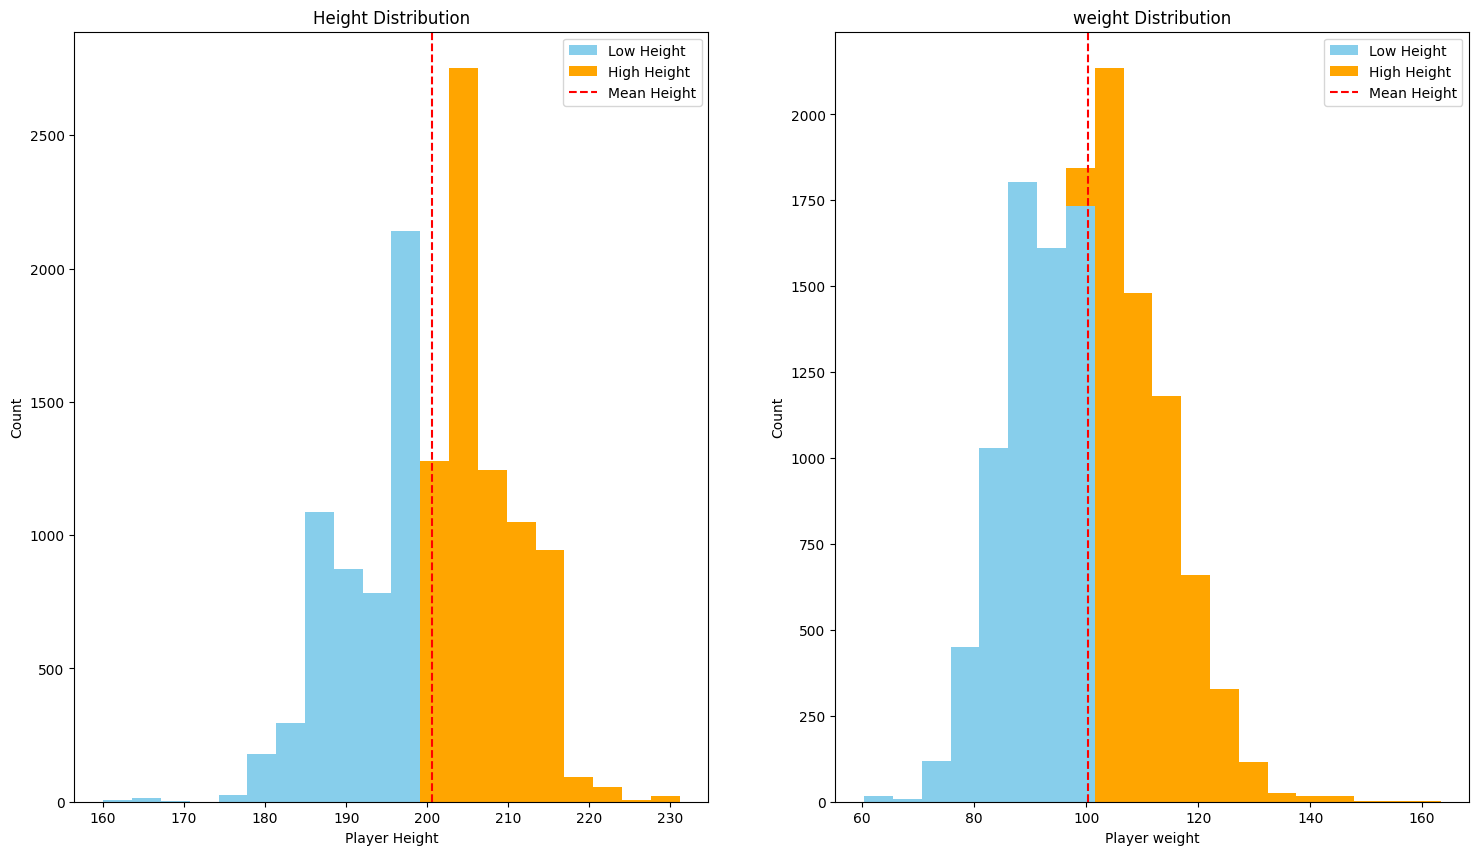

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Height_katagory plot
low_height = df[df['Height_katagory'] == 'low']['player_height']
high_height = df[df['Height_katagory'] == 'high']['player_height']

# Plot
axes[0].hist([low_height, high_height], bins=20, stacked=True, label=['Low Height', 'High Height'], color=['skyblue', 'orange'])
axes[0].axvline(df['player_height'].mean(), color='red', linestyle='--', label='Mean Height')
axes[0].legend()
axes[0].set_xlabel('Player Height')
axes[0].set_ylabel('Count')
axes[0].set_title('Height Distribution')

# Height_katagory plot
low_weight = df[df['Weight_katagory'] == 'low']['player_weight']
high_weight = df[df['Weight_katagory'] == 'high']['player_weight']

# Plot
axes[1].hist([low_weight, high_weight], bins=20, stacked=True, label=['Low Height', 'High Height'], color=['skyblue', 'orange'])
axes[1].axvline(df['player_weight'].mean(), color='red', linestyle='--', label='Mean Height')
axes[1].legend()
axes[1].set_xlabel('Player weight')
axes[1].set_ylabel('Count')
axes[1].set_title('weight Distribution')

plt.show()

save_plot2(fig, 'devied to clases', save_dir)


In [112]:
low_weight_pts = df[df['Weight_katagory'] == 'low']['pts']
high_weight_pts = df[df['Weight_katagory'] == 'high']['pts']
low_height_pts = df[df['Height_katagory'] == 'low']['pts']
high_height_pts = df[df['Height_katagory'] == 'high']['pts']

statistic_height, p_value_height = MWU_test(low_height_pts, high_height_pts)
statistic_weight, p_value_weight = MWU_test(low_weight_pts, high_weight_pts)

Mann-Whitney U statistic: 21404676.5
P-value: 1.5823360816208045e-10
Mann-Whitney U statistic: 21540897.5
P-value: 1.434619179876524e-06


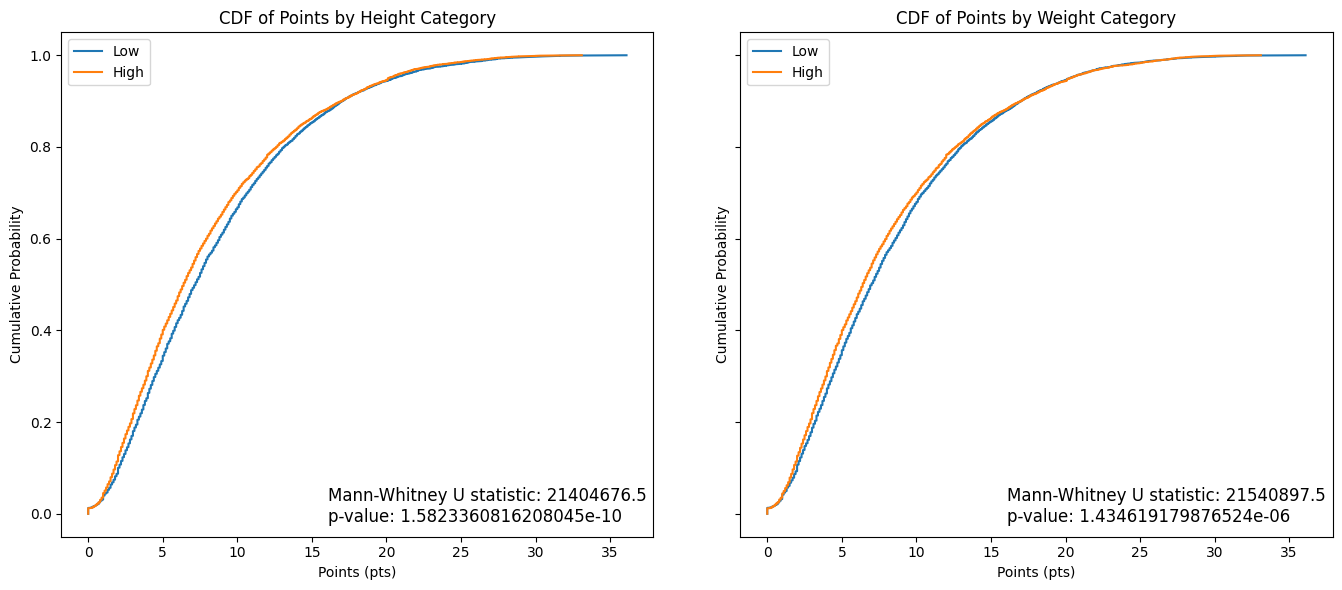

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

ax = axes[0]
# ---- Left plot: CDF by Height ----
for height_cat in df['Height_katagory'].unique():
    group = df[df['Height_katagory'] == height_cat]
    sorted_pts = group['pts'].sort_values()
    cdf = sorted_pts.rank(method='first') / len(sorted_pts)
    ax.plot(sorted_pts.values, cdf.values, label=height_cat.capitalize())

ax.set_title('CDF of Points by Height Category')
ax.set_xlabel('Points (pts)')
ax.set_ylabel('Cumulative Probability')
ax.legend()
#ax.grid(True)
ax.text(0.45, 0.03, f"Mann-Whitney U statistic: {statistic_height}\np-value: {p_value_height}",
            transform=ax.transAxes,
            fontsize=12)

ax = axes[1]
# ---- Right plot: CDF by Weight ----
for weight_cat in df['Weight_katagory'].unique():
    group = df[df['Weight_katagory'] == weight_cat]
    sorted_pts = group['pts'].sort_values()
    cdf = sorted_pts.rank(method='first') / len(sorted_pts)
    ax.plot(sorted_pts.values, cdf.values, label=weight_cat.capitalize())

ax.set_title('CDF of Points by Weight Category')
ax.set_xlabel('Points (pts)')
ax.legend()
ax.set_ylabel('Cumulative Probability')
ax.text(0.45, 0.03, f"Mann-Whitney U statistic: {statistic_weight}\np-value: {p_value_weight}",
            transform=ax.transAxes,
            fontsize=12)
#axes[1].grid(True)

plt.tight_layout()
plt.show()


save_plot2(fig, 'CDF and MW for weight and height', save_dir)